# Librerías a implementar

In [35]:
# Manejo de datos
import numpy as np
import pandas as pd

# Configuración para ver todas las columnas del conjunto de datos
pd.set_option('display.max_columns', None)

# Configuración para ver todas las filas del conjunto de metadatos
pd.set_option('display.max_rows', None)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

# Desactivas advertencias 
import warnings
warnings.filterwarnings('ignore')


# Introducción y Cargue de datos

In [36]:
data = pd.read_csv('/home/jorfan/Universidad/Semestre_6/ML2/PROYECTO_FINAL/train.csv')
data.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [37]:
# Información general del conjunto de datos
print(data.shape)
data.describe()

(307511, 122)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Análisis Exploratorio de Datos

## Análisis Univariado

### Análisis Categórico

#### Conversión de variables a tipo "category"
Se realiza la conversión de las variables que tengan menos de 12 valores únicos y tipo "object" a tipo "category", con el objetivo de no tener variables numéricas que en realidad son categóricas. Esto adicionalmente nos permitirá tener desde un inicio los tipos de variables segmentados.

In [38]:
# Se convierten algunas variables a tipo "category"
for var in data.columns:
    if len(data[var].unique()) <= 12:
        data[var] = data[var].astype('category')
    elif data[var].dtypes == 'object':
        data[var] = data[var].astype('category')
    else:
        data[var] = data[var].astype('float64')

# Se crea una variable que contiene la lista de variables categóricas
columnas_categoricas = data.select_dtypes(include=['category']).columns.tolist()

# Cantidad de variables categóricas iniciales
len(columnas_categoricas)

57

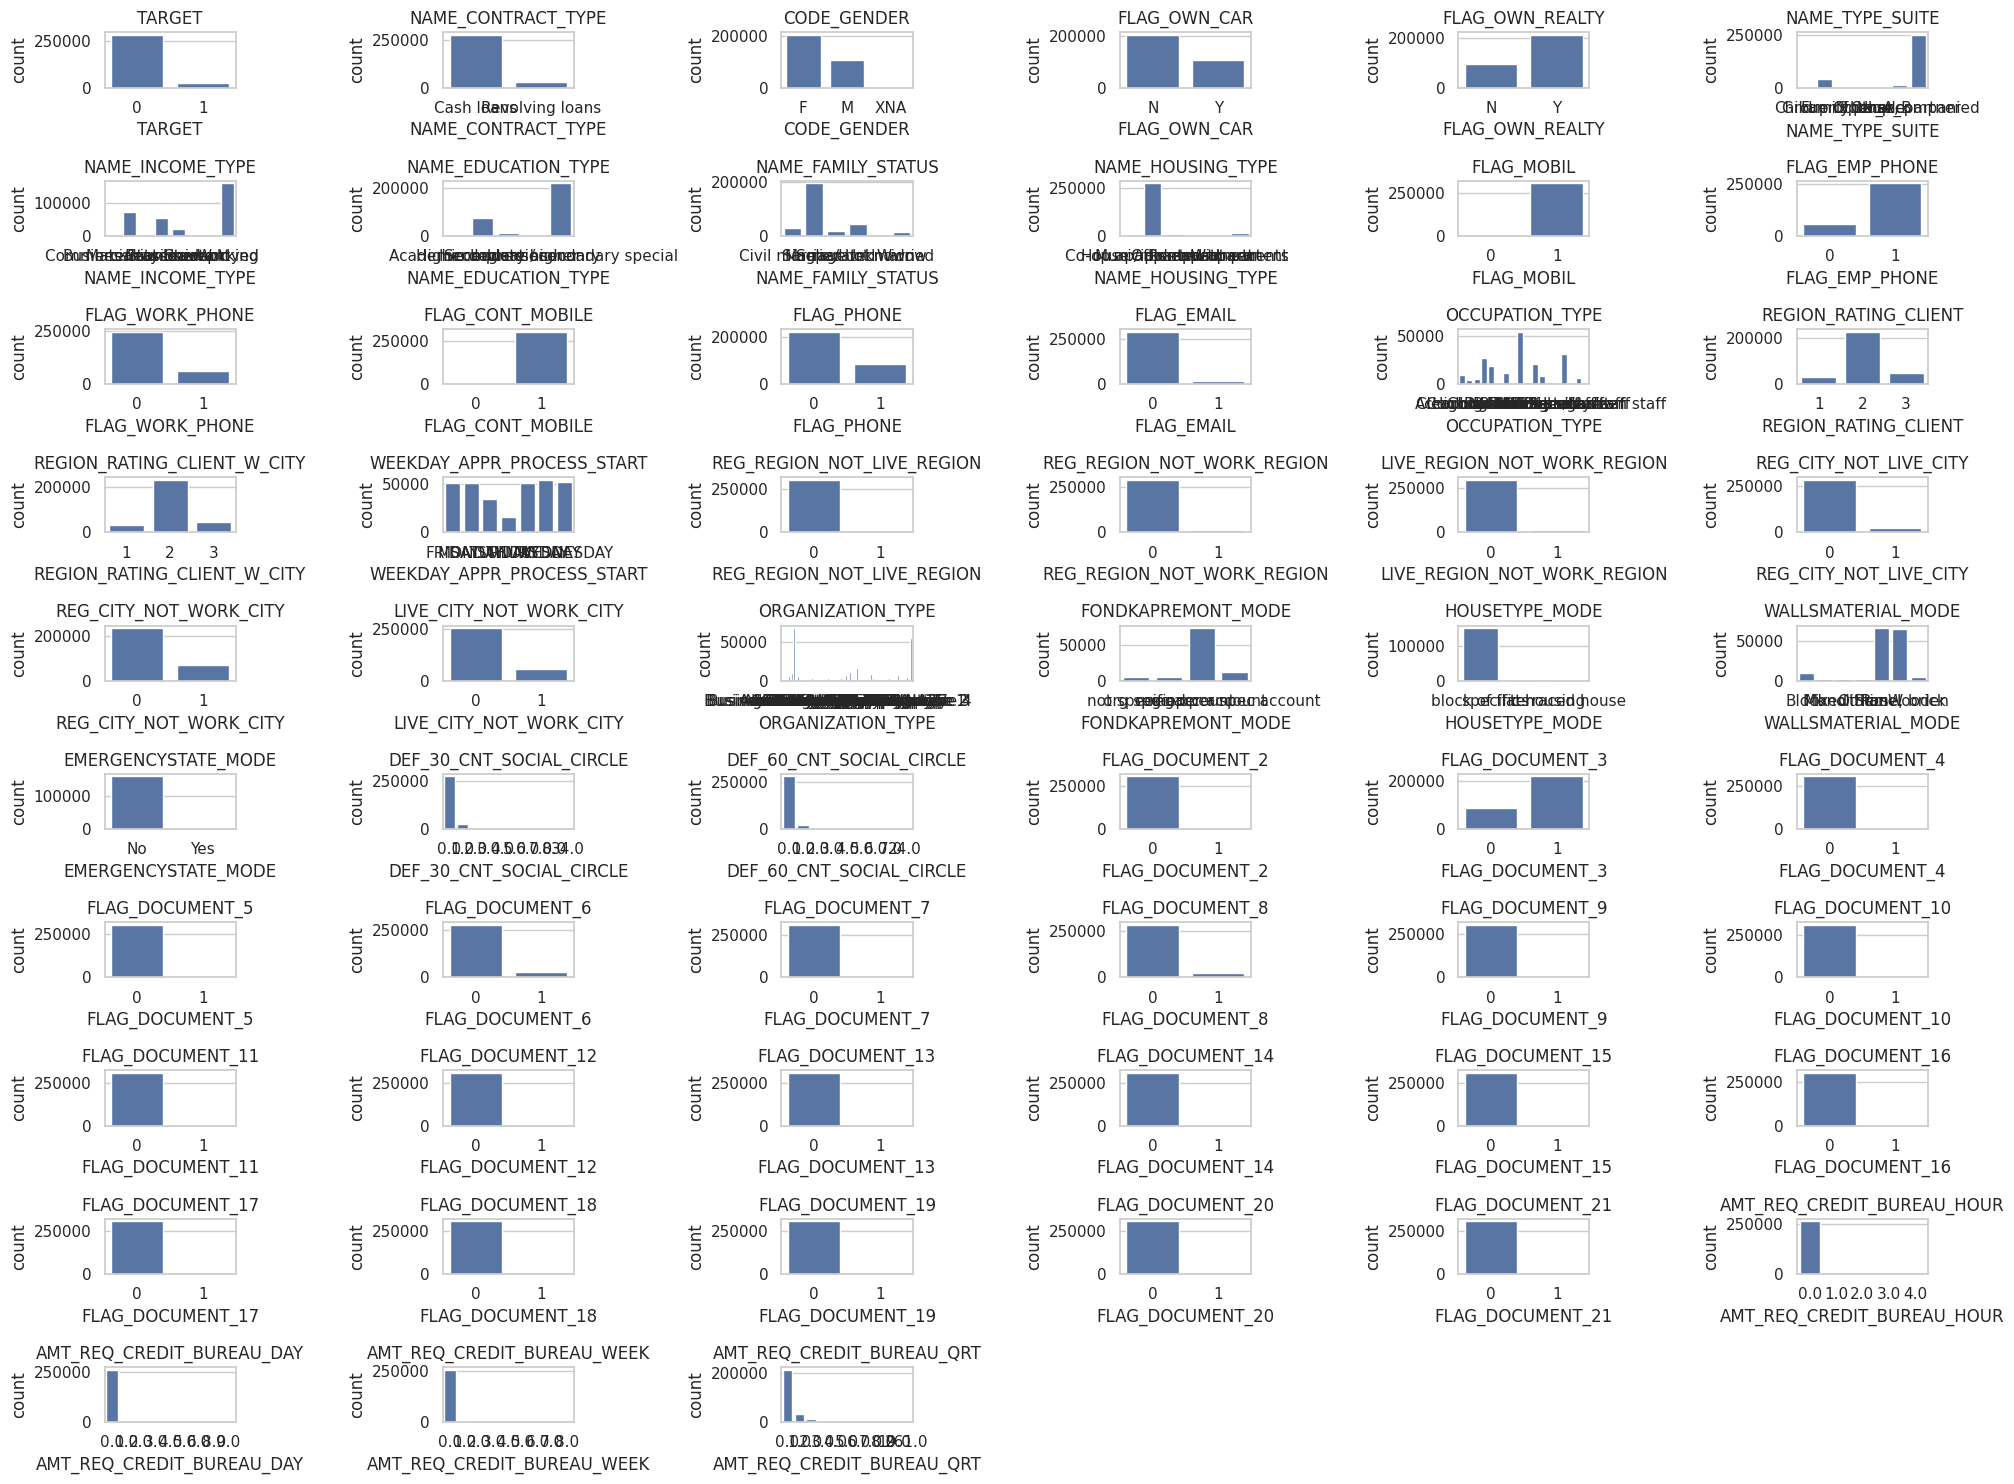

In [ ]:
# Un panorama general de las variables categóricas 
# Estilo general
sns.set_theme(style="whitegrid")  

# Configuración de la figura y subgráficos
n_filas = 10
n_columnas = 6
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(25, 18)) 
axes = axes.flatten() 

for i, columna in enumerate(columnas_categoricas):
    if i < len(axes):  
        sns.countplot(
            data=data, 
            x=columna, 
            ax=axes[i], 
            palette="pastel" 
        )
        axes[i].set_title(columna) 
        axes[i].set_xlabel("") 
        axes[i].set_ylabel("Frecuencia", fontsize=8) 
    else:
        axes[i].axis('off')  

# Desactivar gráficos vacíos
for j in range(len(columnas_categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

#### Tratamiento de valores faltantes

In [40]:
# Se calcula la proporción de valores faltantes por variable
porcentaje = data[columnas_categoricas].isnull().mean() * 100

# Se filtra por variables que tienen más de 30% de valores faltantes
var_con_faltantes = porcentaje[porcentaje > 30].index.tolist()

# Proporci+on de faltantes
var_faltantes = porcentaje[porcentaje > 30]

# Columnas con más del 30% de valores faltantes
print("Columnas con más del 30% de valores faltantes:")
print(var_con_faltantes, len(var_con_faltantes))
print(var_faltantes)

Columnas con más del 30% de valores faltantes:
['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] 5
OCCUPATION_TYPE        31.345545
FONDKAPREMONT_MODE     68.386172
HOUSETYPE_MODE         50.176091
WALLSMATERIAL_MODE     50.840783
EMERGENCYSTATE_MODE    47.398304
dtype: float64


Visualización de variables con mayor cantidad de valores faltantes.

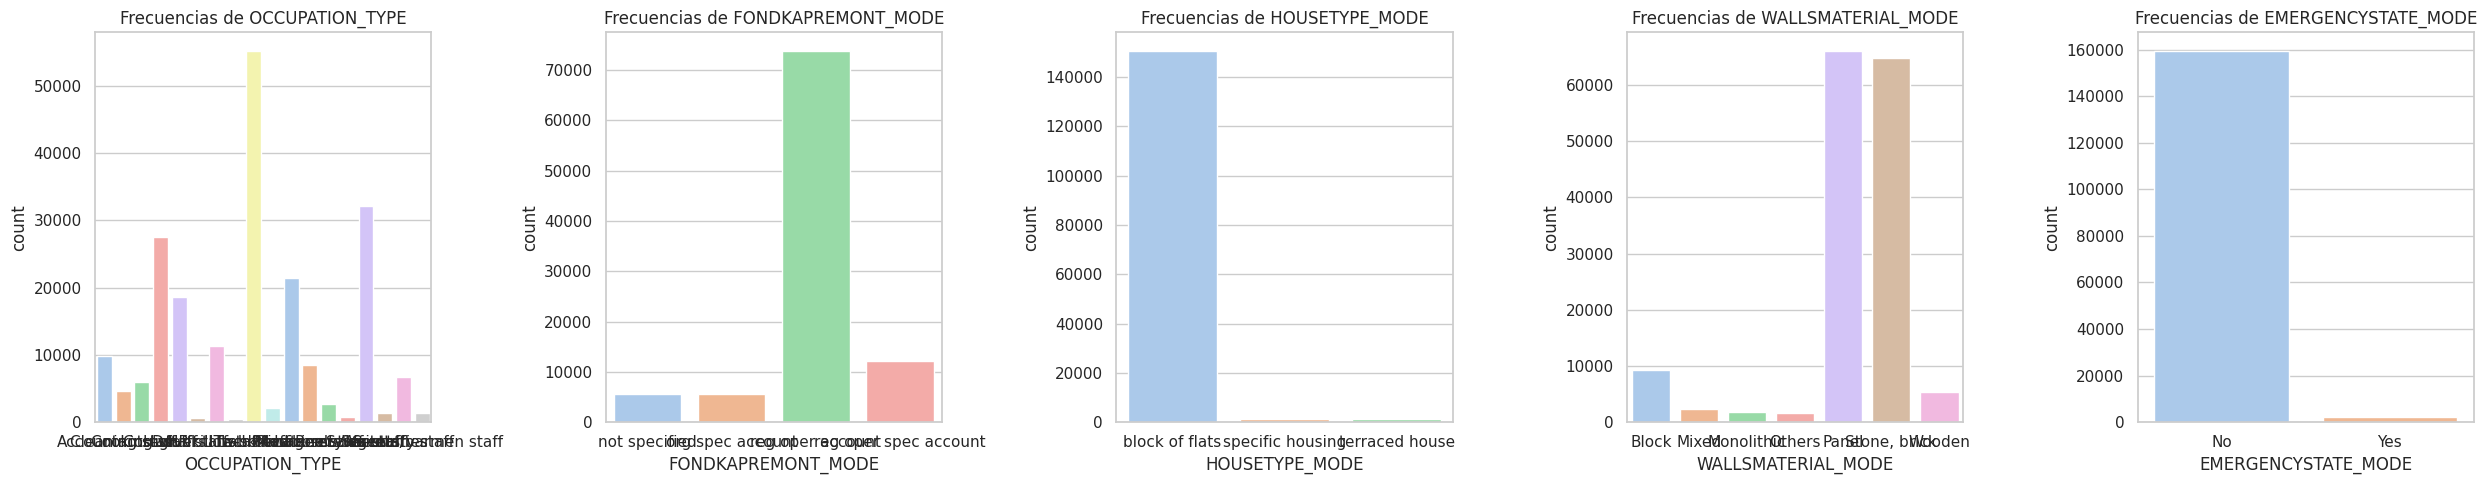

In [41]:
fig, axes = plt.subplots(1, len(var_con_faltantes), figsize=(5 * len(var_con_faltantes), 5))

# Se itera sobre las columnas y los ejes
for i, col in enumerate(var_con_faltantes):
    sns.countplot(x=col, data=data, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')
    
plt.tight_layout()
plt.show()

Se decide eliminar las columnas ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], pues tienen un proporción de valores faltantes superior a 47%, lo cual es una cantidad que no se puede imputar y tampoco se pueden eliminar los registros. Por otro lado, se decide conservar la variable 'OCCUPATION_TYPE' ya que tiene menor proporción de valores faltantes, sin embargo, la razón principal, es que se considera que es una variable importante para el negocio, pues se quiere predecir si se le prestará dinero a una persona o no, seguramente el tipo de ocupación sea útil.

In [42]:
# se eliminan las variables que continen una gran cantidad de valores nulos 
elementos_a_eliminar = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
columnas_categoricas = [x for x in columnas_categoricas if x not in elementos_a_eliminar]
len(columnas_categoricas)

53

Ahora, se eliminan los registros de las variables que tienen menos de 5% de valores faltantes ya que, la cantidad de datos es suficiente para hacer el análisis y el modelo sin los registros eliminados.

In [43]:
porcentaje = data[columnas_categoricas].isnull().mean() * 100
columns_to_clean = porcentaje[porcentaje < 5].index

# Se eliminan los registros de las variables que cumplen la condición anterior
data = data.dropna(subset=columns_to_clean)

Se verifican las variables con valores faltantes restantes

In [44]:
porcentaje = data[columnas_categoricas].isnull().mean() * 100
columnas_con_nulos = porcentaje[porcentaje > 0]

# Columnas con valores nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
OCCUPATION_TYPE               31.350468
AMT_REQ_CREDIT_BUREAU_HOUR    13.512539
AMT_REQ_CREDIT_BUREAU_DAY     13.512539
AMT_REQ_CREDIT_BUREAU_WEEK    13.512539
AMT_REQ_CREDIT_BUREAU_QRT     13.512539
dtype: float64


Dado que las  variables restantes tienen menor cantidad de valores atípicos, se incluirá a cada variable una categoría llamada "desconocido" y se añadirán los valores nulos a esta categoría

In [45]:
# Se le agrega la categoria desconocido
for columna in columnas_categoricas:
    # Se añade 'Desconocido' a las categorías si no está presente
    data[columna] = data[columna].astype('category')
    if 'Desconocido' not in data[columna].cat.categories:
    # Si no está, agregar 'Desconocido'
        data[columna] = data[columna].cat.add_categories('Desconocido')
    
    # Se rellena los valores nulos con 'Desconocido'
    data[columna] = data[columna].fillna('Desconocido')
data[columnas_categoricas] = data[columnas_categoricas].fillna('Desconocido')

In [46]:
# Se verifica que ya no hayan nulos 
porcentaje = data[columnas_categoricas].isnull().mean() * 100

# Se filtran las columas
columns_with_many_missing = porcentaje[porcentaje > 0].index.tolist()

# Mostrar las columnas 
print("Columnas con más del 0% de valores faltantes:")
print(columns_with_many_missing, len(columns_with_many_missing))

Columnas con más del 0% de valores faltantes:
[] 0


#### Detección de categorías atípicas
Al tener distintas categorías en las variables del conjunto de datos pueden llegar a tener muy pocos registros lo que no aporta suficiente información relevante para el análisis, lo que podría distorsionar los resultados si se las mantiene como categorías separadas. Agruparlas en la categoría "Otros" ayuda a reducir el ruido en los datos.

In [47]:
# Este código convierte las categorias de una variable que tengan menos del 10% de los datos en una categoria llamada otros
# Umbral 
threshold = 0.1

# Función para obtener categorías atípicas y agruparlas en "Otros"
def find_low_frequency_categories(df, threshold):
    for col in columnas_categoricas:
        frequencies = df[col].value_counts(normalize=True)  # Porcentajes
        # Se detecta categorías con baja frecuencia relativa
        low_frequency_categories = frequencies[frequencies < threshold]

        # Si hay más de 2 categorías con baja frecuencia, agruparlas en 'Otros'
        if len(low_frequency_categories) > 2:
            # Se crea una nueva columna con 'Otros' para las categorías con baja frecuencia
            df[col] = df[col].apply(lambda x: x if frequencies[x] >= threshold else 'Otros')
            print(f"\nDespués de agrupar, la columna {col} tiene las siguientes categorías:")
            print(df[col].value_counts())

find_low_frequency_categories(data, threshold)


Después de agrupar, la columna NAME_TYPE_SUITE tiene las siguientes categorías:
NAME_TYPE_SUITE
Unaccompanied    247637
Family            40058
Otros             17503
Name: count, dtype: int64

Después de agrupar, la columna NAME_INCOME_TYPE tiene las siguientes categorías:
NAME_INCOME_TYPE
Working                 157661
Commercial associate     70937
Pensioner                54995
Otros                    21605
Name: count, dtype: int64

Después de agrupar, la columna NAME_EDUCATION_TYPE tiene las siguientes categorías:
NAME_EDUCATION_TYPE
Secondary / secondary special    217067
Higher education                  73966
Otros                             14165
Name: count, dtype: int64

Después de agrupar, la columna NAME_FAMILY_STATUS tiene las siguientes categorías:
NAME_FAMILY_STATUS
Married                 195053
Otros                    65163
Single / not married     44982
Name: count, dtype: int64

Después de agrupar, la columna NAME_HOUSING_TYPE tiene las siguientes categorías:


In [48]:
# Se eliminan las categorias de Desconocidos en donde no tiene valores 
data[columnas_categoricas] = data[columnas_categoricas].apply(lambda x: x.astype('category'))
for columna in columnas_categoricas:
    # Se verificar si la categoría 'Desconocido' está presente y si tiene valores
    if 'Desconocido' in data[columna].cat.categories and data[columna].value_counts().get('Desconocido', 0) == 0:
        # Se elimina la categoría 'Desconocido' si no tiene valores
        data[columna] = data[columna].cat.remove_categories('Desconocido')

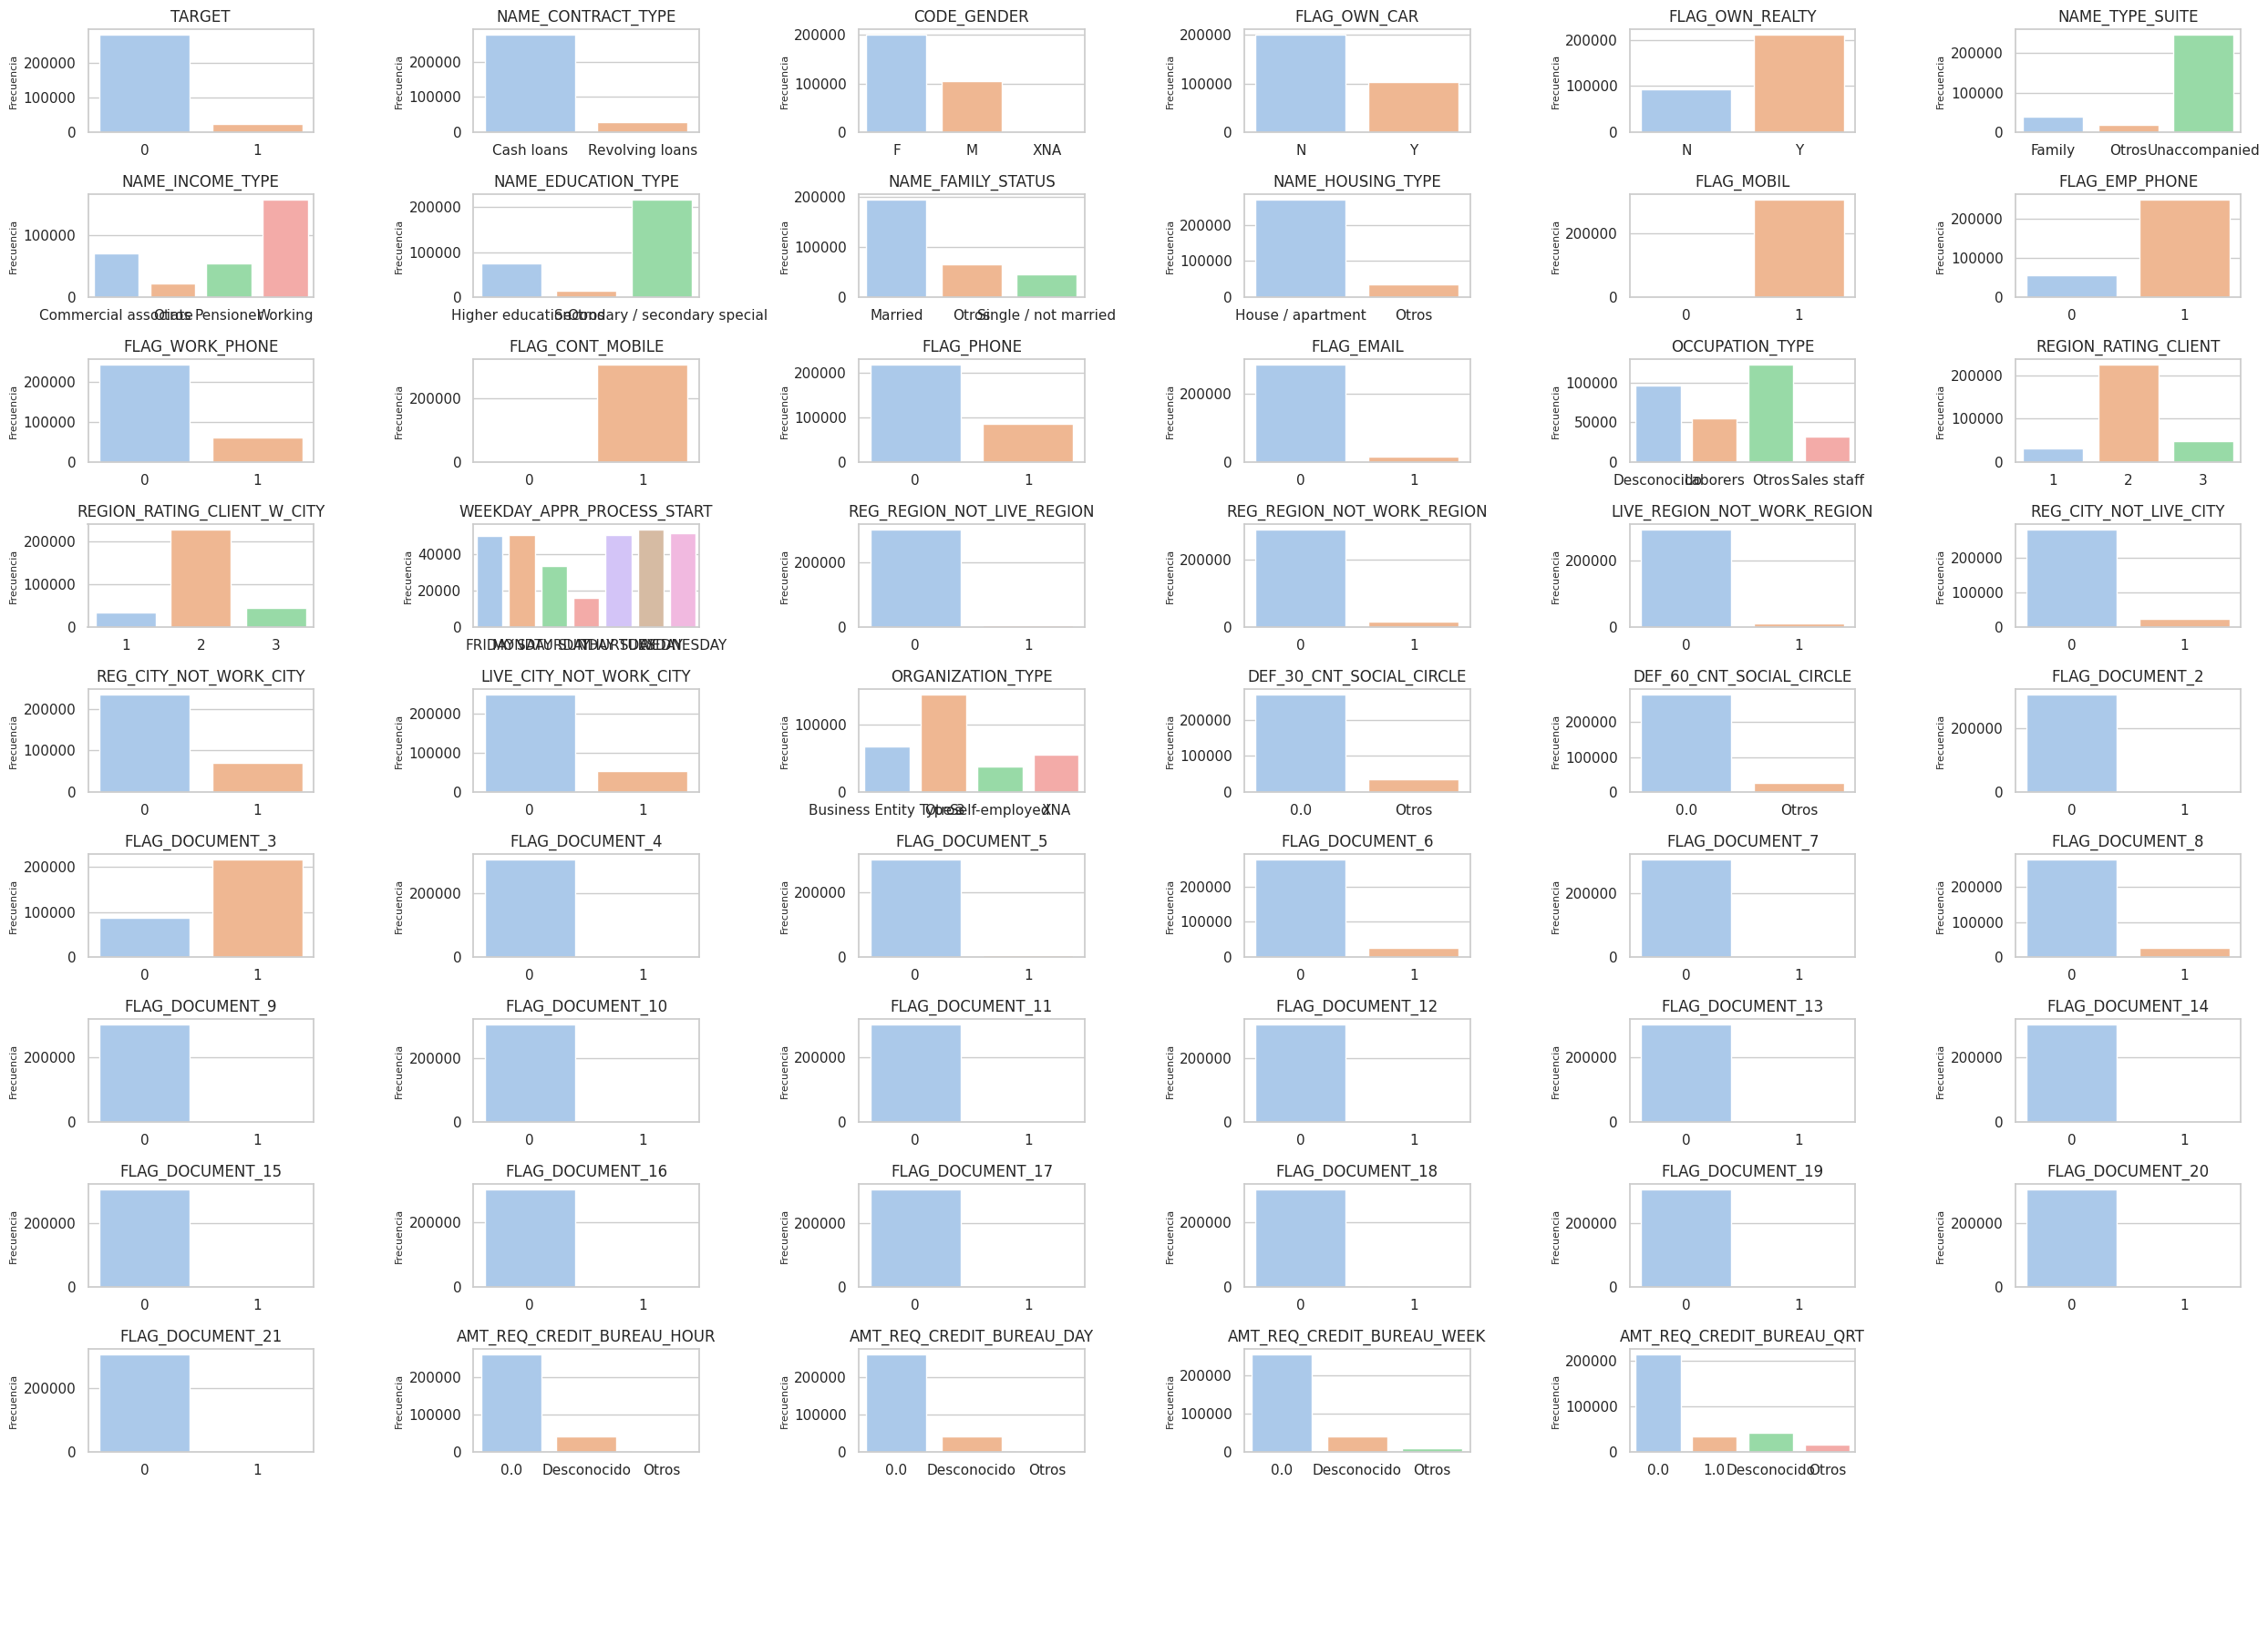

In [49]:
# Estilo general
sns.set_theme(style="whitegrid")  

# Configuración de la figura y subgráficos
n_filas = 10
n_columnas = 6
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(25, 18)) 
axes = axes.flatten() 

for i, columna in enumerate(columnas_categoricas):
    if i < len(axes):  
        sns.countplot(
            data=data, 
            x=columna, 
            ax=axes[i], 
            palette="pastel" 
        )
        axes[i].set_title(columna) 
        axes[i].set_xlabel("") 
        axes[i].set_ylabel("Frecuencia", fontsize=8) 
    else:
        axes[i].axis('off')  

# Desactivar gráficos vacíos
for j in range(len(columnas_categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()


#### Selección de variables categóricas

In [50]:
# Se obtienen las variables que tienen relación significativa con la variable objetivo 
# Nivel de significancia
alpha = 0.05
relacion_sig =[]
# Se itera sobre las columnas categóricas
for col in columnas_categoricas:
    # tabla de contingencia
    contingency_table = pd.crosstab(data[col], data['TARGET'])
    
    # rueba de chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Se verifica si el valor p es menor que el nivel de significancia
    if p <= alpha:
        relacion_sig.append(col)
        #print(f"Variable '{col}' tiene una relación significativa con 'TARGET' (p-value = {p})")

In [51]:
# Se disminuye la cantidad de variables categóricas candidatas
len(relacion_sig)

41

Se conservan las variables que tienen una relación significativa con la variable objetivo y posteriormente se eligen las variables categóricas que aportan más infomación al modelo a partir de la entropía.

In [52]:
# Función para calcular la entropía de una variable categórica
def calcular_entropia(columna):
    frecuencias = columna.value_counts(normalize=True)
    entropia = -np.sum(frecuencias * np.log2(frecuencias))
    return entropia

# Se calcula la entropía para cada columna categórica
entropias = {col: calcular_entropia(data[col]) for col in relacion_sig}
entropias_ordenadas = sorted(entropias.items(), key=lambda x: x[1], reverse=True)

top_10_variables = entropias_ordenadas[:10]
top_10_variables_nombre = list(map(lambda t: t[0], top_10_variables))

print("Top 10 variables categóricas con mayor entropía:")
for col, entropia in top_10_variables:
    print(f"{col}: {entropia}")

Top 10 variables categóricas con mayor entropía:
WEEKDAY_APPR_PROCESS_START: 2.7322464507199626
OCCUPATION_TYPE: 1.838477876387785
ORGANIZATION_TYPE: 1.8122935381890617
NAME_INCOME_TYPE: 1.6975084189223022
AMT_REQ_CREDIT_BUREAU_QRT: 1.3297126879334988
NAME_FAMILY_STATUS: 1.2955329906945625
REGION_RATING_CLIENT: 1.0832762996155216
REGION_RATING_CLIENT_W_CITY: 1.0676247894676059
NAME_EDUCATION_TYPE: 1.0507912974246525
CODE_GENDER: 0.9264111102795107


Se eligen estas variables porque suelen contener más información útil y relevante para discriminar entre las clases objetivo, adicionalmente, se está frente a un conjunto de datos donda la mayoría de las variables tienen una clase dominante, al usar esta metodología aparte de que se está obteniendo información útil para el modelo, también se está diminuyendo el sesgo.

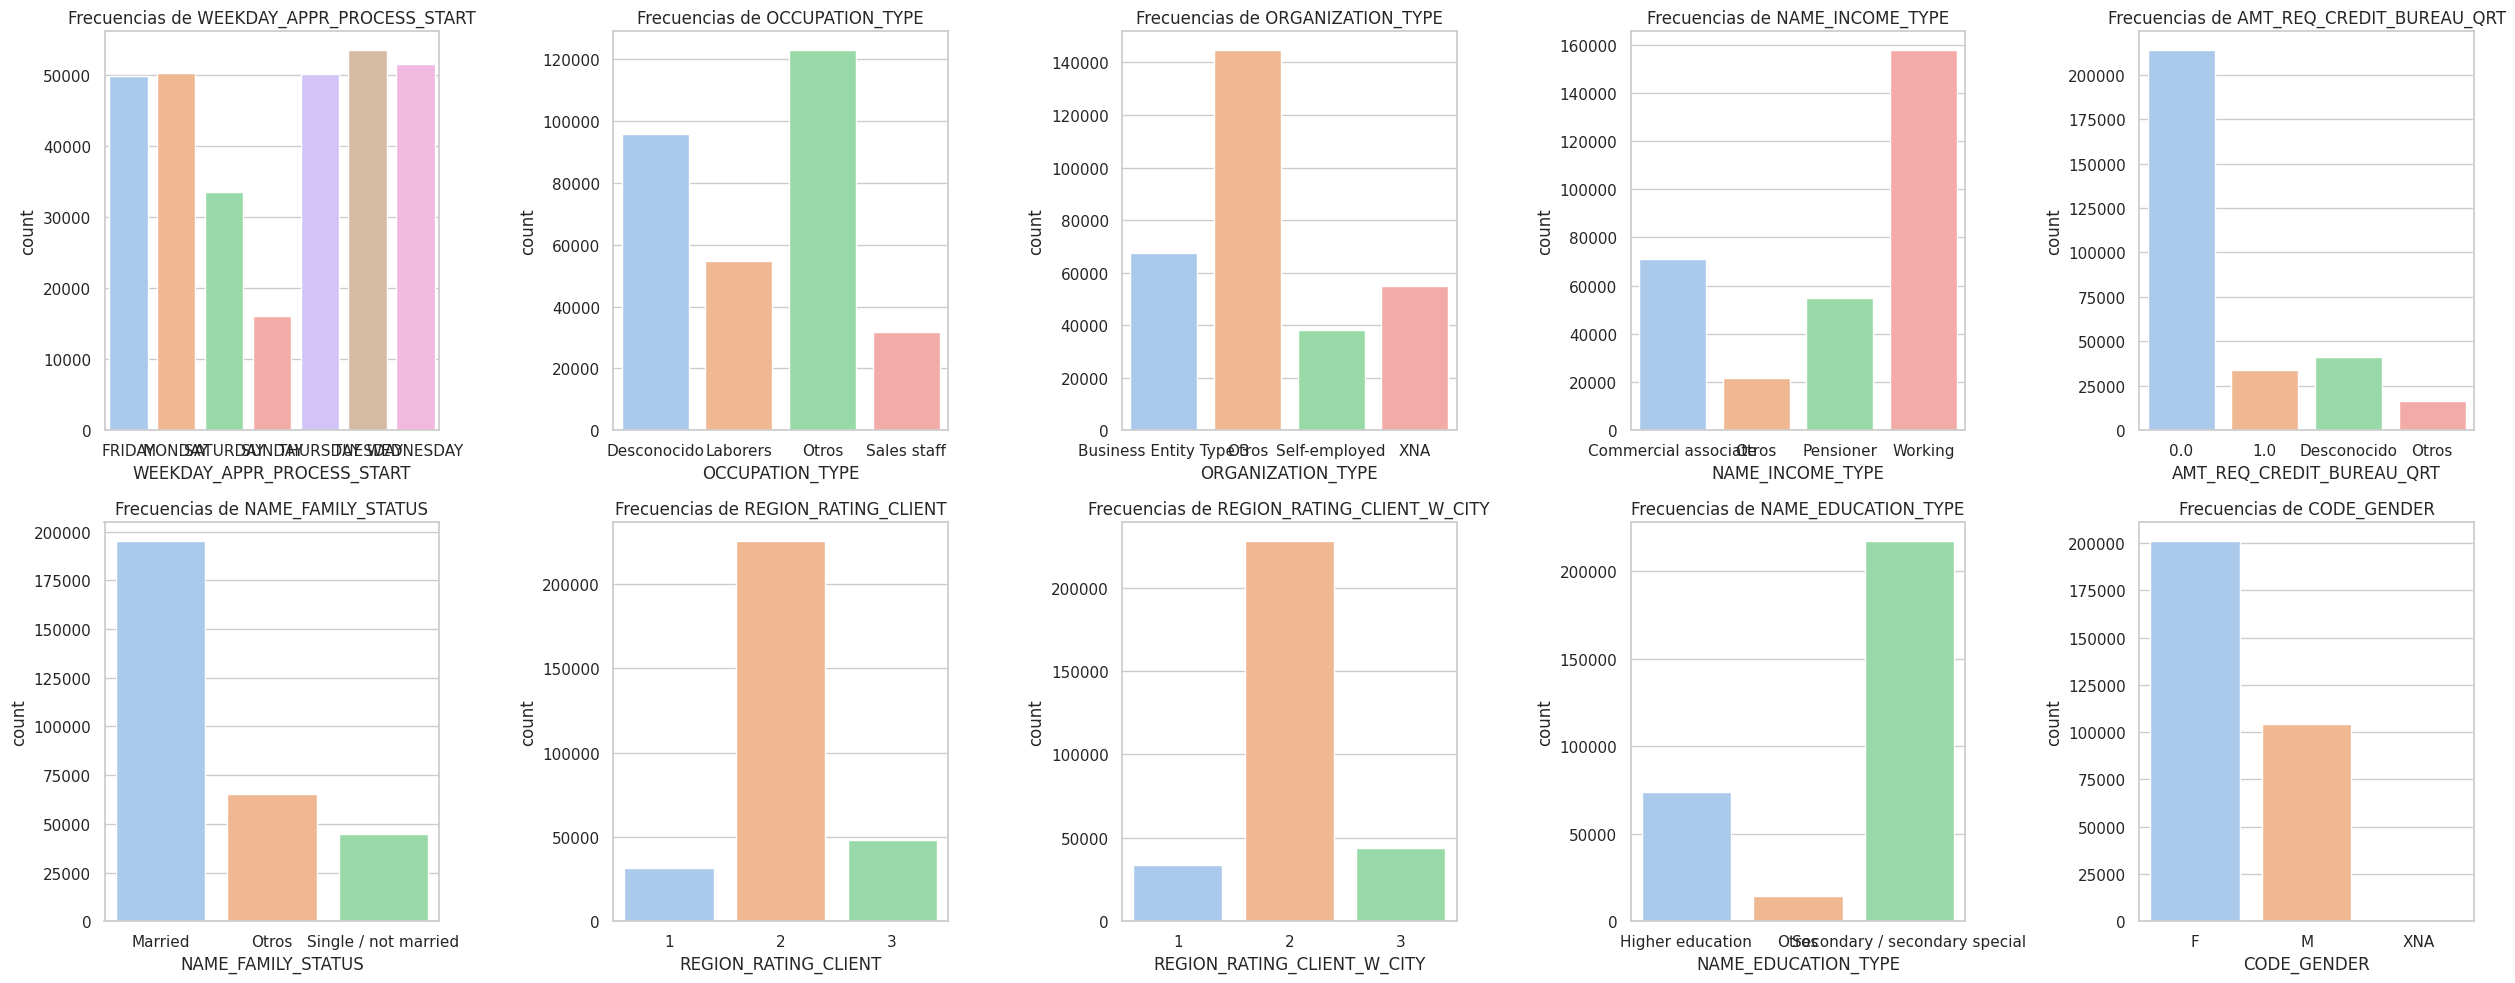

In [53]:
fig, axes = plt.subplots(2, 5, figsize=(5 * 5, 5 * 2))

axes = axes.flatten()

for i, col in enumerate(top_10_variables_nombre):
    sns.countplot(x=col, data=data, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Análisis Numérico

#### Selección de variables numéricas

## Análisis Bivariado

### Numérico - Numérico

### Categórico - Categórico

### Numérico - Categórico

# Modelado

## Selección y justificación de los modelos

## Selección y justificación de métricas

## Implementación del <modelo 1>

## Implementación del <modelo 2>

## Comparación de modelos

# Conclusiones